## This is The Project Analysis Document.
For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.
We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.
Here is what the columns represent:

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by  LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


## Exploratory Data Analysis
in this section we will check and explore the data to get it ready to build predictive model.
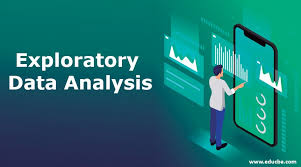

In [557]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [558]:
# Reading the data
loans = pd.read_csv('loan_data.csv')

In [559]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [560]:
loans.describe()
# checking the data's statistical description

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [561]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [562]:
# First let's check for null values in our data set
loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

As we can see there isn't null values

<AxesSubplot:>

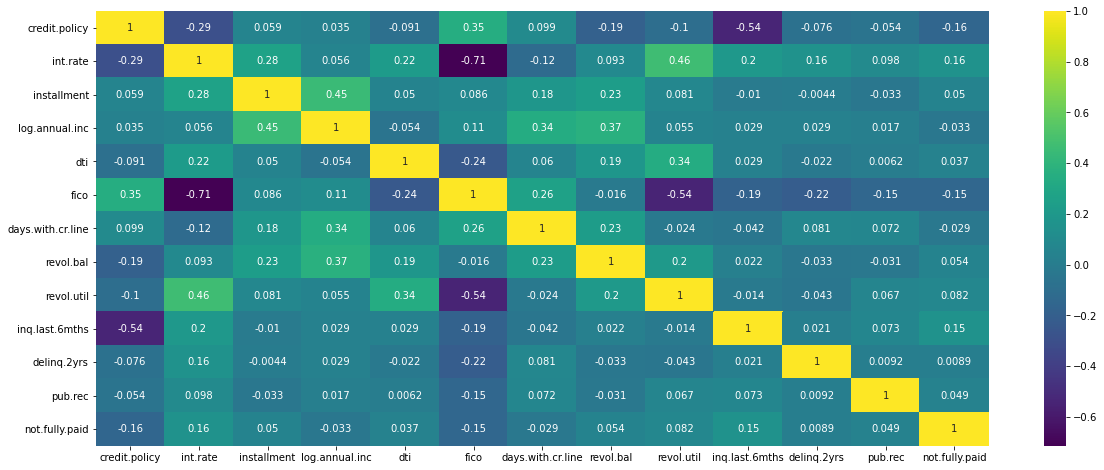

In [563]:
# let's check the correlation between variables
plt.figure(figsize=(20,8))
sns.heatmap(loans.corr(),annot=True,cmap='viridis')

Text(0.5, 0, 'FICO')

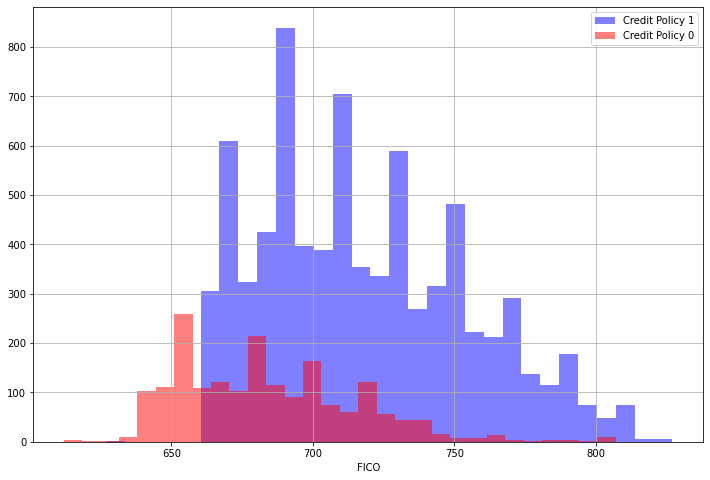

In [564]:
# Fico is an american credit score method, a higher score means a borrower more likely to return his loan in full.
# The credit policy means tells you if the borrower is officialy qualified for the loan.
# let's check correlation between fico and credit policy with a distribution histogram
plt.figure(figsize=(12,8))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit Policy 1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit Policy 0')
plt.legend()
plt.xlabel('FICO')
# We can see the higher a users fico score is, the more likely he is to qualified for a loan.

Text(0.5, 1.0, 'Credit policy Distribution')

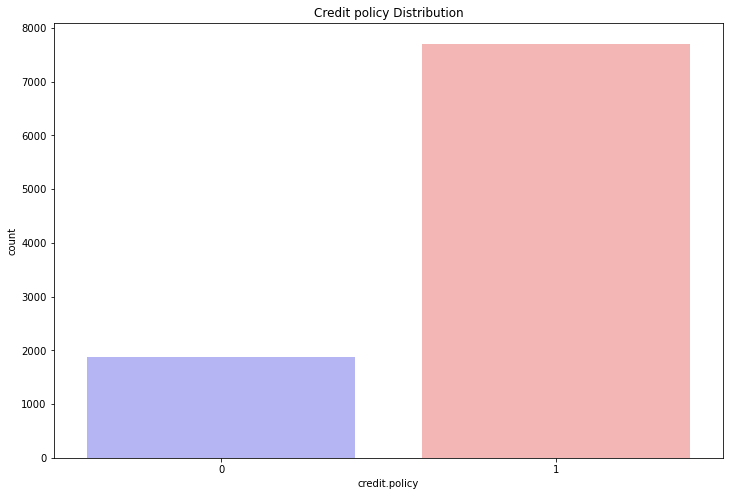

In [565]:
# Let's see how the customers are divided into credit policies (whether they qualify for a loan)
plt.figure(figsize=(12,8))
sns.countplot(x='credit.policy',data=loans,palette='bwr')
plt.title('Credit policy Distribution')

In [566]:
loans['credit.policy'].value_counts(normalize=True)

1    0.80497
0    0.19503
Name: credit.policy, dtype: float64

About 80% of the borrowers fits the credit policy

<AxesSubplot:xlabel='inq.last.6mths', ylabel='count'>

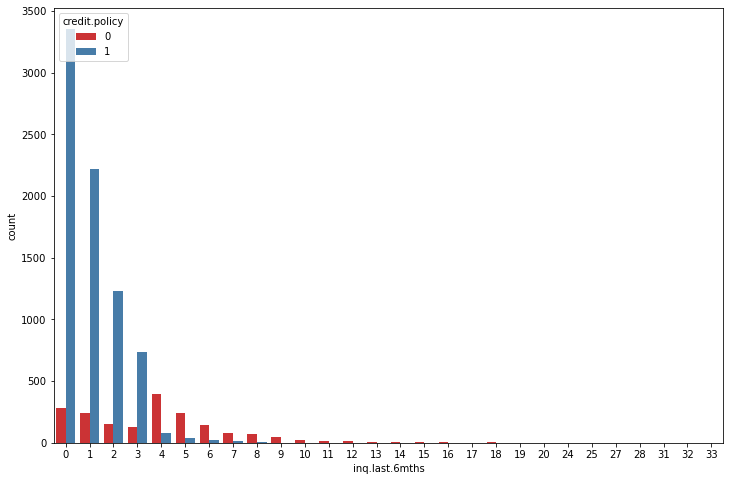

In [567]:
# Checking the ratio between the number of inquiries the borrower got from the lenders if he fits the credit policy or not
plt.figure(figsize=(12,8))
sns.countplot(x='inq.last.6mths',hue='credit.policy',data=loans,palette='Set1')

<AxesSubplot:xlabel='pub.rec', ylabel='fico'>

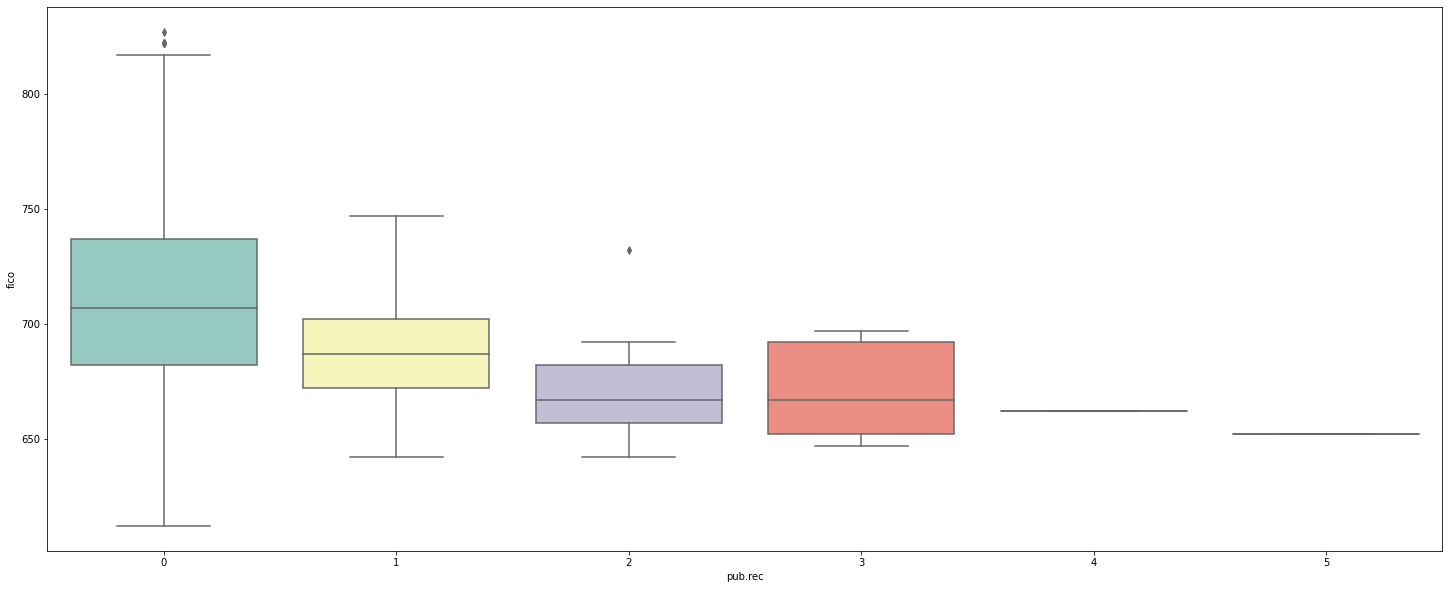

In [568]:
# Let's check the relationship between the fico score and  the public records. Public record tell us whether the 
# customer has had legal issues in the past. As you can see, the more records he has, the lower the fico score is.
plt.figure(figsize=(25,10))
sns.boxplot(x='pub.rec',y='fico',data=loans,palette='Set3')

As we can see, when the amount of inquiries increases - it is clear that the people doesn't fit the credit policy

<Figure size 864x576 with 0 Axes>

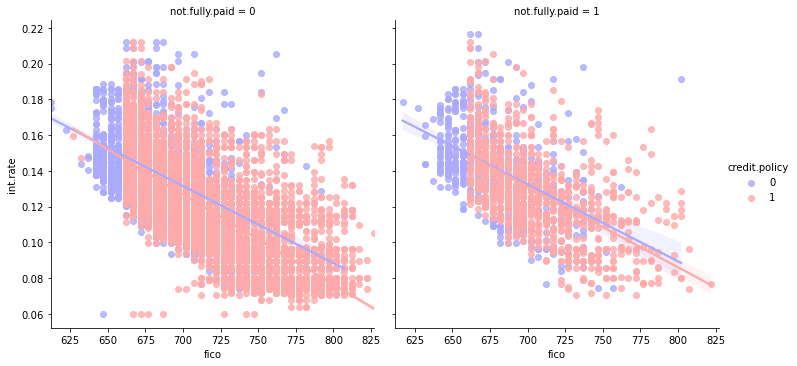

In [569]:
# lets check the corelation between the interest rate to fico score, classified with the credit policy, with
# a split to who fully paid his debt vs not paid.
plt.figure(figsize=(12,8))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',col='not.fully.paid',palette='bwr')

<AxesSubplot:xlabel='purpose', ylabel='installment'>

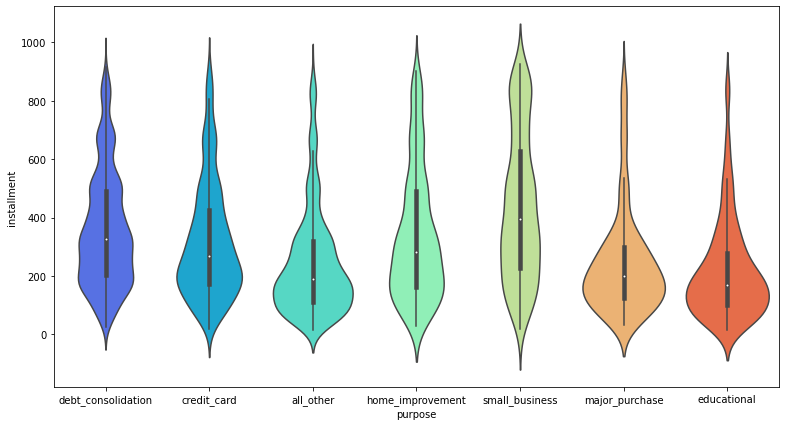

In [570]:
# Let's try to understand the distribution of the installment size based on the purpose of the loan
plt.figure(figsize=(13,7))
sns.violinplot(y='installment',x='purpose',data=loans,palette='rainbow',orient='v')

As we can see, based on the purpose of the loan, there is a slight difference in the installment amount in our data observations.
it is clear that people who the purpose of the loan is small businesses get a higher installment,which implies on a short term loan.
the major size of the installment of all the other loan purposes is between 0+-300, which implies on a medium size installment amount, and basically of immediate purchases (like credit debt) or a long term loan the have a small monthly payment amount.


<AxesSubplot:xlabel='credit.policy', ylabel='installment'>

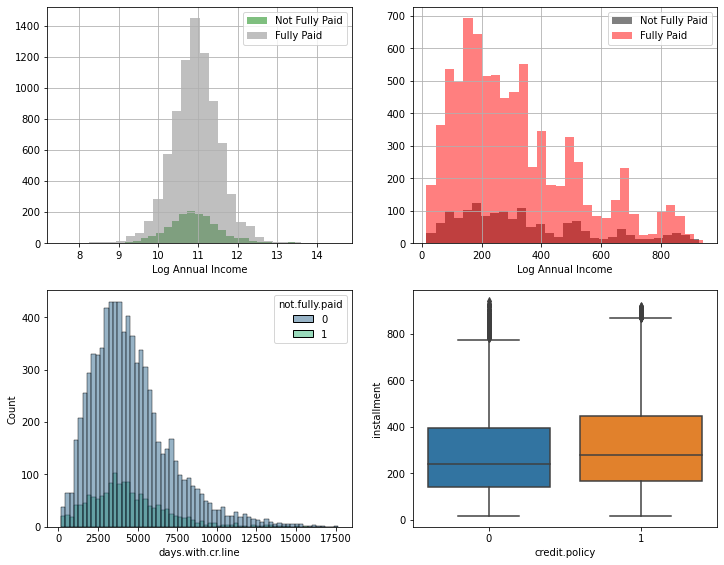

In [571]:
plt.figure(figsize=(12,20))
plt.subplot(4,2,1)
loans[loans['not.fully.paid']==1]['log.annual.inc'].hist(alpha=0.5,color='green',bins=30,label='Not Fully Paid')
loans[loans['not.fully.paid']==0]['log.annual.inc'].hist(alpha=0.5,color='grey',bins=30,label='Fully Paid')
plt.legend()
plt.xlabel('Log Annual Income')

plt.subplot(4,2,2)
loans[loans['not.fully.paid']==1]['installment'].hist(alpha=0.5,color='black',bins=30,label='Not Fully Paid')
loans[loans['not.fully.paid']==0]['installment'].hist(alpha=0.5,color='red',bins=30,label='Fully Paid')
plt.legend()
plt.xlabel('Log Annual Income')

plt.subplot(4,2,3)
sns.histplot(loans,x='days.with.cr.line',hue='not.fully.paid',palette='viridis')
plt.subplot(4,2,4)
sns.boxplot(x='credit.policy',y='installment',data=loans)

- We can see here that the distribution of log annual income is approximately normal to paid and not paid loans,
- We can see that the log annual income of people who not fully paid is lower substantially than people who did which make sense
- We can see the more credit line days there is the more people who paid the loan fully - which make sense.
- installment average payment is higher in people who fits the credit policy

# Logistic Regression
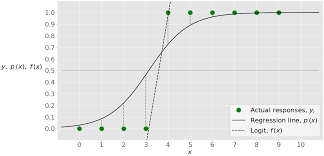
We decided to take the logistic regression algorithm to solving our business model, which is evaluating 
the probability of a borrower to pay back a loan fully.
We would like to classify the borrower condition with our models. 
first, we will try to understand which of our features contributes to our model and which isn't

In [572]:
# First, lets take care of our categorial features
features = ['purpose']
loans_final = pd.get_dummies(loans,columns=features,drop_first=True)
loans_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

 We will change the data type for faster running 

In [573]:
loans_final['credit.policy'] = loans_final['credit.policy'].astype('int32')
loans_final['int.rate'] = loans_final['int.rate'].astype('float32')
loans_final['installment'] = loans_final['installment'].astype('float32')
loans_final['log.annual.inc'] = loans_final['log.annual.inc'].astype('float32')
loans_final['dti'] = loans_final['dti'].astype('float32')
loans_final['fico'] = loans_final['fico'].astype('int32')
loans_final['days.with.cr.line'] = loans_final['days.with.cr.line'].astype('float32')
loans_final['revol.bal'] = loans_final['revol.bal'].astype('int32')
loans_final['revol.util'] = loans_final['revol.util'].astype('float32')
loans_final['inq.last.6mths'] = loans_final['inq.last.6mths'].astype('int32')
loans_final['delinq.2yrs'] = loans_final['delinq.2yrs'].astype('int32')
loans_final['pub.rec'] = loans_final['pub.rec'].astype('int32')
loans_final['not.fully.paid'] = loans_final['not.fully.paid'].astype('int32')
loans_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int32  
 1   int.rate                    9578 non-null   float32
 2   installment                 9578 non-null   float32
 3   log.annual.inc              9578 non-null   float32
 4   dti                         9578 non-null   float32
 5   fico                        9578 non-null   int32  
 6   days.with.cr.line           9578 non-null   float32
 7   revol.bal                   9578 non-null   int32  
 8   revol.util                  9578 non-null   float32
 9   inq.last.6mths              9578 non-null   int32  
 10  delinq.2yrs                 9578 non-null   int32  
 11  pub.rec                     9578 non-null   int32  
 12  not.fully.paid              9578 non-null   int32  
 13  purpose_credit_card         9578 

## Statistical Evaluation
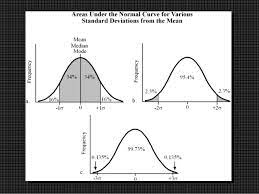
before creating a model, 
we will try to understand which of the features are relevant to our model.
by using statmodels package.

In [574]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
y = loans_final['not.fully.paid']
X = loans_final.drop('not.fully.paid',axis=1)
log_reg = sm.Logit(y,X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.412280
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         not.fully.paid   No. Observations:                 9578
Model:                          Logit   Df Residuals:                     9560
Method:                           MLE   Df Model:                           17
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                 0.06249
Time:                        17:26:28   Log-Likelihood:                -3948.8
converged:                       True   LL-Null:                       -4212.0
Covariance Type:            nonrobust   LLR p-value:                5.123e-101
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
credit.policy                 -0.4031      0.083     -4.832      0.000      -0.567      -0.240
int.rate                       8.6448      1.343      6.437      0.000       6.012      11.277
installment                    0.0007      0.000      4.358      0.000       0.000       0.001
log.annual.inc                -0.2160      0.052     -4.185      0.000      -0.317      -0.115
dti                            0.0022      0.005      0.483      0.629      -0.007       0.011
fico                          -0.0008      0.001     -1.179      0.239      -0.002       0.001
days.with.cr.line          -1.008e-05    1.3e-05     -0.776      0.438   -3.56e-05    1.54e-05
revol.bal                   1.934e-06   8.89e-07      2.174      0.030     1.9e-07    3.68e-06
revol.util                     0.0045      0.001      3.665      0.000       0.002       0.007
inq.last.6mths                 0.0839      0.013      6.232      0.000       0.058       0.110
delinq.2yrs                   -0.0264      0.053     -0.495      0.621      -0.131       0.078
pub.rec                        0.3005      0.097      3.097      0.002       0.110       0.491
purpose_credit_card           -0.5106      0.109     -4.680      0.000      -0.724      -0.297
purpose_debt_consolidation    -0.2895      0.077     -3.759      0.000      -0.440      -0.139
purpose_educational            0.1502      0.151      0.996      0.319      -0.145       0.446
purpose_home_improvement       0.0567      0.126      0.451      0.652      -0.189       0.303
purpose_major_purchase        -0.3513      0.166     -2.121      0.034      -0.676      -0.027
purpose_small_business         0.4247      0.115      3.680      0.000       0.199       0.651
==============================================================================================
"""

In [575]:
# we will omit the undistinct variables from our model.
X_clear = loans_final[['credit.policy','int.rate','installment','log.annual.inc',
                       'fico','revol.bal','revol.util','inq.last.6mths','pub.rec','purpose_credit_card',
                       'purpose_debt_consolidation','purpose_major_purchase','purpose_small_business']]
X_train, X_test, y_train, y_test = train_test_split(X_clear, y, test_size=0.2, random_state=42)
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
predictions = log_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
unnormalized_relevant = log_model.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.60      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.72      0.51      0.48      1916
weighted avg       0.80      0.84      0.77      1916



## Normalizing Our Data
we decided to normalize our data to see differnece and to keep importance of sizes of our features based on out observation vector.
we know that on proportionally sizes distrubing our model evaluation.

In [576]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = loans_final['not.fully.paid']
X = loans_final.drop('not.fully.paid',axis=1)
X_normalize = X.copy()
X_col = list(np.where(X_normalize.max() > 1))
col_names = list(X_normalize.columns[X_col])
features = X_normalize[col_names]
features = scaler.fit_transform(features)
X_normalize[col_names] = features
log_reg = sm.Logit(y,X_normalize).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.409930
         Iterations 6


C:\Users\ido_d\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         not.fully.paid   No. Observations:                 9578
Model:                          Logit   Df Residuals:                     9560
Method:                           MLE   Df Model:                           17
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                 0.06783
Time:                        17:26:28   Log-Likelihood:                -3926.3
converged:                       True   LL-Null:                       -4212.0
Covariance Type:            nonrobust   LLR p-value:                1.588e-110
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
credit.policy                 -0.3286      0.084     -3.922      0.000      -0.493      -0.164
int.rate                       1.5770      1.106      1.425      0.154      -0.592       3.746
installment                    1.1141      0.144      7.716      0.000       0.831       1.397
log.annual.inc                -2.8511      0.370     -7.703      0.000      -3.577      -2.126
dti                           -0.0092      0.136     -0.067      0.946      -0.276       0.258
fico                          -1.9283      0.216     -8.921      0.000      -2.352      -1.505
days.with.cr.line              0.2266      0.231      0.982      0.326      -0.226       0.679
revol.bal                      3.6488      1.137      3.209      0.001       1.420       5.877
revol.util                     0.2865      0.150      1.906      0.057      -0.008       0.581
inq.last.6mths                 2.8593      0.451      6.333      0.000       1.974       3.744
delinq.2yrs                   -1.1425      0.718     -1.592      0.111      -2.549       0.264
pub.rec                        1.2353      0.487      2.538      0.011       0.281       2.189
purpose_credit_card           -0.5319      0.109     -4.882      0.000      -0.745      -0.318
purpose_debt_consolidation    -0.3369      0.077     -4.392      0.000      -0.487      -0.187
purpose_educational            0.0686      0.151      0.455      0.649      -0.227       0.364
purpose_home_improvement       0.0931      0.126      0.737      0.461      -0.155       0.341
purpose_major_purchase        -0.3530      0.166     -2.127      0.033      -0.678      -0.028
purpose_small_business         0.5371      0.116      4.636      0.000       0.310       0.764
==============================================================================================
"""

In [577]:
# Dropping non relevant features
X_normalize_clear = X_normalize.drop(['delinq.2yrs','int.rate','dti','days.with.cr.line','purpose_educational','purpose_home_improvement'],axis=1)
log_reg2 = sm.Logit(y,X_normalize_clear).fit()
log_reg2.summary()

Optimization terminated successfully.
         Current function value: 0.410222
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         not.fully.paid   No. Observations:                 9578
Model:                          Logit   Df Residuals:                     9566
Method:                           MLE   Df Model:                           11
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                 0.06717
Time:                        17:26:28   Log-Likelihood:                -3929.1
converged:                       True   LL-Null:                       -4212.0
Covariance Type:            nonrobust   LLR p-value:                2.824e-114
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
credit.policy                 -0.3182      0.084     -3.798      0.000      -0.482      -0.154
installment                    1.1448      0.143      8.010      0.000       0.865       1.425
log.annual.inc                -2.5505      0.279     -9.131      0.000      -3.098      -2.003
fico                          -1.8559      0.204     -9.115      0.000      -2.255      -1.457
revol.bal                      3.5601      1.074      3.314      0.001       1.454       5.666
revol.util                     0.4093      0.132      3.098      0.002       0.150       0.668
inq.last.6mths                 3.0405      0.442      6.886      0.000       2.175       3.906
pub.rec                        1.3326      0.482      2.767      0.006       0.389       2.276
purpose_credit_card           -0.5590      0.104     -5.389      0.000      -0.762      -0.356
purpose_debt_consolidation    -0.3546      0.069     -5.152      0.000      -0.490      -0.220
purpose_major_purchase        -0.3696      0.162     -2.276      0.023      -0.688      -0.051
purpose_small_business         0.5364      0.108      4.946      0.000       0.324       0.749
==============================================================================================
"""

## Training And Evaluating Our model - Logistic Regression
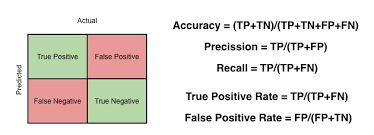
In this part We will evaluate our final model to see relevant metrics, and decide if our analysis can show great results.

Let's import classification report for evaluating our model

In [578]:
from sklearn.metrics import classification_report

In [579]:
# Normalized Data cleared from allegedly unrelevant features.
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train,y_train)
predictions = log_model.predict(X_test)
print(classification_report(y_test,predictions))
normalized_relevant = log_model.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.53      0.03      0.06       305

    accuracy                           0.84      1916
   macro avg       0.69      0.51      0.49      1916
weighted avg       0.79      0.84      0.78      1916



In [580]:
# normalized data with all the features
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.2, random_state=42)
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
predictions = log_model.predict(X_test)
logistic_pred = classification_report(y_test,predictions,output_dict=True)
print(classification_report(y_test,predictions))
normalized_all = log_model.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.53      0.03      0.06       305

    accuracy                           0.84      1916
   macro avg       0.69      0.51      0.49      1916
weighted avg       0.79      0.84      0.78      1916



Text(0.5, 1.0, 'Accuracy Of models - when considering Scaling and distinct features')

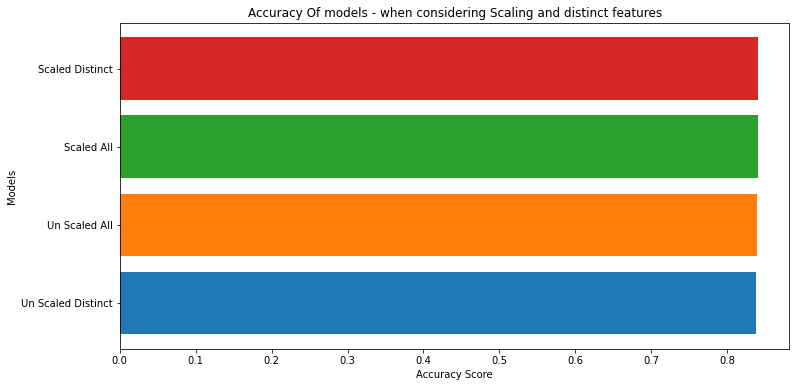

In [581]:
names = ['Un Scaled All','Un Scaled Distinct','Scaled All','Scaled Distinct']
Acc_lst = [unnormalized_all,unnormalized_relevant,normalized_all,normalized_relevant]
plt.figure(figsize=(12,6))
for acc,name in sorted(zip(Acc_lst,names)):
    plt.barh(name,acc)
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.title('Accuracy Of models - when considering Scaling and distinct features')

As we can see , there isn't distinct difference betweem the accuracy scores in the model evaluation sector, 
therfore we decided to evaluate our model with another algorithm to maybe get a better results.

## Decision Tree 
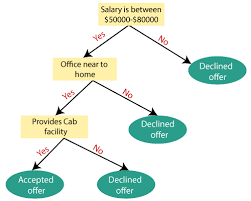
In this sector we will evaluate again our model with different algorithm. 
This time it will be A Decision Tree

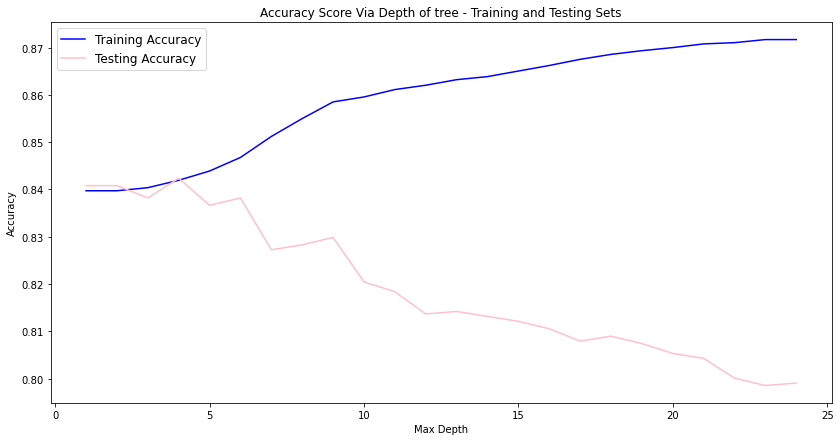

In [582]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.2, random_state=42)
# First , lets understand what is the optimal max depth to use
val = range(1,25)
# Creating Accuracy lists
train_acc, test_acc = [], []
# Setting range and creating loop for classification 
for depth in val:
    # creating decision tree object with d max_depth
    dtree = DecisionTreeClassifier(max_depth = depth,random_state=42,min_samples_leaf=10)
    # fitting the object to the train set
    dtree.fit(X_train, y_train)
    # appending the accuracy score to both lists
    train_acc.append(dtree.score(X_train, y_train))
    test_acc.append(dtree.score(X_test, y_test))
plt.figure(figsize=(14,7))
plt.plot(val,train_acc, c='blue', label='Training Accuracy')
plt.plot(val,test_acc, c='pink', label='Testing Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.title('Accuracy Score Via Depth of tree - Training and Testing Sets')
plt.legend(fontsize=12)
plt.show()

We can see that the optimal max depth is across 4, depth that is bigger than this depth won't bring any change
we will change the max_features to 'auto' and splitting criterion to 'entropy', random state to 52 after evaluating the best hyperparamteters by balancing the test and train accuracy sets
1. max features will check the auto amount of features to split by
2. entropy is another metric to specify purity , the difference is that it is a logarithmic computation which is slower


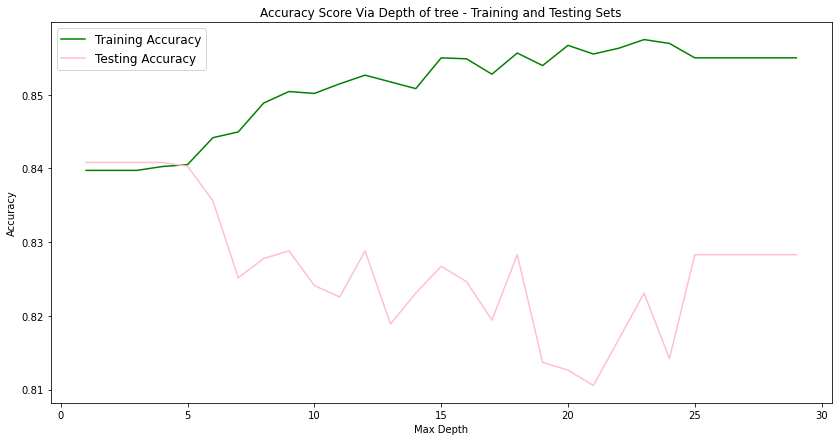

In [583]:
val = range(1,30)
# Creating Accuracy lists
train_acc, test_acc = [], []
# Setting range and creating loop for classification 
for depth in val:
    # creating decision tree object with d max_depth
    dtree = dtree = DecisionTreeClassifier(max_depth = depth ,min_samples_leaf=10,random_state=52,
                               criterion='entropy',max_features='auto')
    # fitting the object to the train set
    dtree.fit(X_train, y_train)
    # appending the accuracy score to both lists
    train_acc.append(dtree.score(X_train, y_train))
    test_acc.append(dtree.score(X_test, y_test))
plt.figure(figsize=(14,7))
plt.plot(val,train_acc, c='green', label='Training Accuracy')
plt.plot(val,test_acc, c='pink', label='Testing Accuracy')
plt.legend(loc ='lower right')
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.title('Accuracy Score Via Depth of tree - Training and Testing Sets')
plt.legend(fontsize=12)
plt.show()

We will represent the importances of the features to our algorithm in this part

## Model Evaluation - Decision Tree
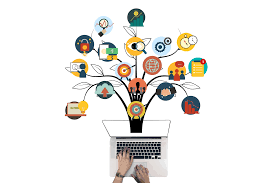

We can see optimal depth of 4 here , where the highest point according to both training and testing sets.

In [584]:
# Fitting our model
dtree = DecisionTreeClassifier(max_depth = 5 ,min_samples_leaf= 10,random_state=52,
                               criterion='entropy',max_features='auto')
dtree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       min_samples_leaf=10, random_state=52)

In [585]:
# Predicting our model results
preds = dtree.predict(X_test)
print(classification_report(y_test,preds))
tree_pred = classification_report(preds,y_test)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.43      0.01      0.02       305

    accuracy                           0.84      1916
   macro avg       0.64      0.50      0.47      1916
weighted avg       0.78      0.84      0.77      1916



Text(0.5, 1.0, 'Feature importances for Decision Trees')

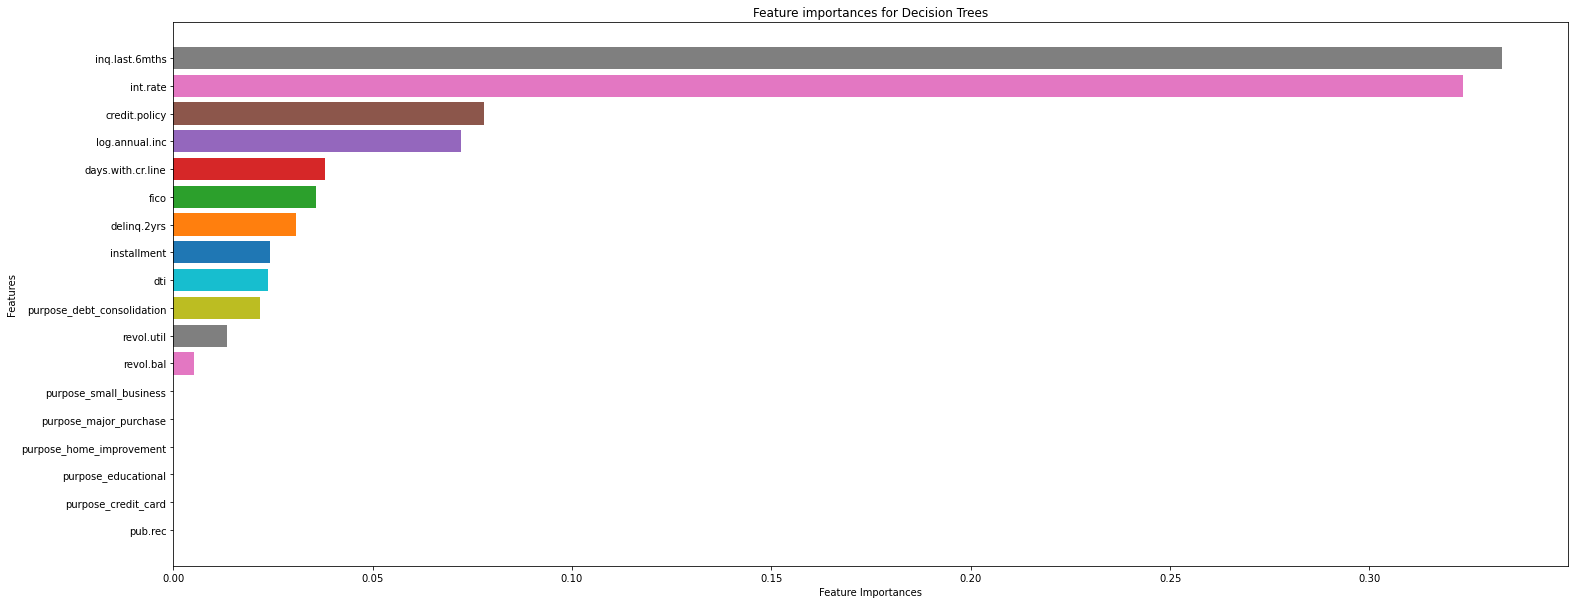

In [586]:
# representing the importances of features
importances = dtree.feature_importances_
columns = X_train.columns
plt.figure(figsize=(25,10))
for importance,feat in sorted(zip(importances,columns)):
    plt.barh(feat,importance)
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.title('Feature importances for Decision Trees')
    

We can see that our most relevant features the credit policy, int.rate and inquiries of last 6 months

In [587]:
loans['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

## Checking our model Performances

In [588]:
# Simulating a random loaner to check wether he will pay his loan back fully
import random
random.seed(101)
new_index = random.randint(0,len(loans))
new_loaner = loans_final.drop(['not.fully.paid'],axis=1).iloc[new_index]
#new_loaner

In [589]:
# Predicting our random customer
new_l = scaler.fit_transform(new_loaner.values.reshape(1,18))
print(f'The model prediction is - {dtree.predict(new_l)[0]}')

The model prediction is - 0


In [590]:
loans_final.loc[new_index,'not.fully.paid']

0

We found exact match and this loaner indeed paid his loan fully back.
Thank you very much for your time!